# Association Rule Mining

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/Data Mining")


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import GroceryStore.csv**

In [69]:
dataset = pd.read_csv("GroceryStore.csv", header=None)
transactions = []
for i in range(len(dataset)):
    transactions.append(dataset.iloc[i, 0].split(","))  # แยกสินค้าในแต่ละ row ออกเป็น list

dataset.head()

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


**Rename 1st Column to itemset**

In [70]:
dataset.rename(columns={0: 'Itemset'}, inplace=True)
dataset

,Itemset
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [71]:
dataset.shape

(20, 1)

**Add to transaction**

In [72]:
print(transactions[:5])


[['MILK', 'BREAD', 'BISCUIT'], ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT']]


**Install and Import apyori**

In [16]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=3e3e913c5d191511cfe03d4e729f4802f927134d10dfe3cf6d9db7a31f59016f
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


**Choose Parameters Value**

In [73]:
from apyori import apriori
rules = apriori(transactions, min_support=0.01,
                min_confidence=0.2, min_lift=1,
                min_length=2, max_length=2)

In [74]:
results = list(rules)
results

[RelationRecord(items=frozenset({'BISCUIT'}), support=0.35, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BISCUIT'}), confidence=0.35, lift=1.0)]),
 RelationRecord(items=frozenset({'BOURNVITA'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BOURNVITA'}), confidence=0.2, lift=1.0)]),
 RelationRecord(items=frozenset({'BREAD'}), support=0.65, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BREAD'}), confidence=0.65, lift=1.0)]),
 RelationRecord(items=frozenset({'COFFEE'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'COFFEE'}), confidence=0.4, lift=1.0)]),
 RelationRecord(items=frozenset({'CORNFLAKES'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'CORNFLAKES'}), confidence=0.3, lift=1.0)]),
 RelationRecord(items=frozenset({'MAGGI'}), support=0.25, ordered_statistics=

**Association Rules**

In [75]:
def inspect(results):
    rules_list = []
    for result in results:
        for ordered_stat in result[2]:  # Iterate through all association rules in result[2]
            lhs = tuple(ordered_stat[0])  # Left-hand side (antecedent)
            rhs = tuple(ordered_stat[1])  # Right-hand side (consequent)
            support = result[1]           # Support
            confidence = ordered_stat[2]  # Confidence
            lift = ordered_stat[3]        # Lift
            rules_list.append((lhs, rhs, support, confidence, lift))

    return rules_list

In [76]:
# Convert to DataFrame
resultsinDataFrame = pd.DataFrame(inspect(results), columns=["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
resultsinDataFrame.head()

,Left hand side,Right hand side,Support,Confidence,Lift
0,(),"(BISCUIT,)",0.35,0.35,1.0
1,(),"(BOURNVITA,)",0.20,0.20,1.0
2,(),"(BREAD,)",0.65,0.65,1.0
3,(),"(COFFEE,)",0.40,0.40,1.0
4,(),"(CORNFLAKES,)",0.30,0.30,1.0


In [79]:
resultsinDataFrame.shape

(52, 5)

In [80]:
resultsinDataFrame.nlargest(n = 5, columns = "Lift")

,Left hand side,Right hand side,Support,Confidence,Lift
44,"(JAM,)","(MAGGI,)",0.10,1.000,4.000000
45,"(MAGGI,)","(JAM,)",0.10,0.400,4.000000
32,"(COCK,)","(COFFEE,)",0.15,1.000,2.500000
33,"(COFFEE,)","(COCK,)",0.15,0.375,2.500000
50,"(MAGGI,)","(TEA,)",0.20,0.800,2.285714


# Clustering Assignment
Complete the following sections of the program.

Fill in the missing parts of the codes! This program contains a bug that I want you to fix.

Enjoy coding!

Student ID **650510714** Name **Panutad Sirikul**


Connect Google Drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Specify the folder in the Drive you want to use

In [4]:
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/Data Mining")


Read data from file

In [88]:
# import pandas
import pandas as pd

# load the file using the read_excel() function
dataset = pd.read_csv('CustomerPurchase.csv')

# show the first few records
dataset.head()

,CustomerID,TotalSales,OrderCount,AvgOrderValue
0,12346.0,16.724999,3.268554,11.731446
1,12347.0,16.457445,6.064173,11.401033
2,12348.0,15.967466,5.573388,10.929590
3,12349.0,15.944096,3.269359,11.683093
4,12350.0,14.267852,3.270165,10.331622


In [89]:
dataset.shape

(4298, 4)

Spicify the columns for being Features




In [90]:
X = dataset[['TotalSales', 'OrderCount','AvgOrderValue']]


In [91]:
print(X)

      TotalSales  OrderCount  AvgOrderValue
0      16.724999    3.268554      11.731446
1      16.457445    6.064173      11.401033
2      15.967466    5.573388      10.929590
3      15.944096    3.269359      11.683093
4      14.267852    3.270165      10.331622
...          ...         ...            ...
4293   13.727909    4.506395       9.149387
4294   13.351560    4.507201       8.403942
4295   13.395078    4.508007       8.482113
4296   16.006149    6.610563       8.670691
4297   15.986002    5.572582      11.311580

[4298 rows x 3 columns]


**K-means Clustering with 4 Clusters**

In [92]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

Result from K-means Clustering Model

In [93]:
cluster_ids = model.predict(X)
print(cluster_ids)

[0 3 3 ... 1 2 3]


Create graphs to show the relationships between data

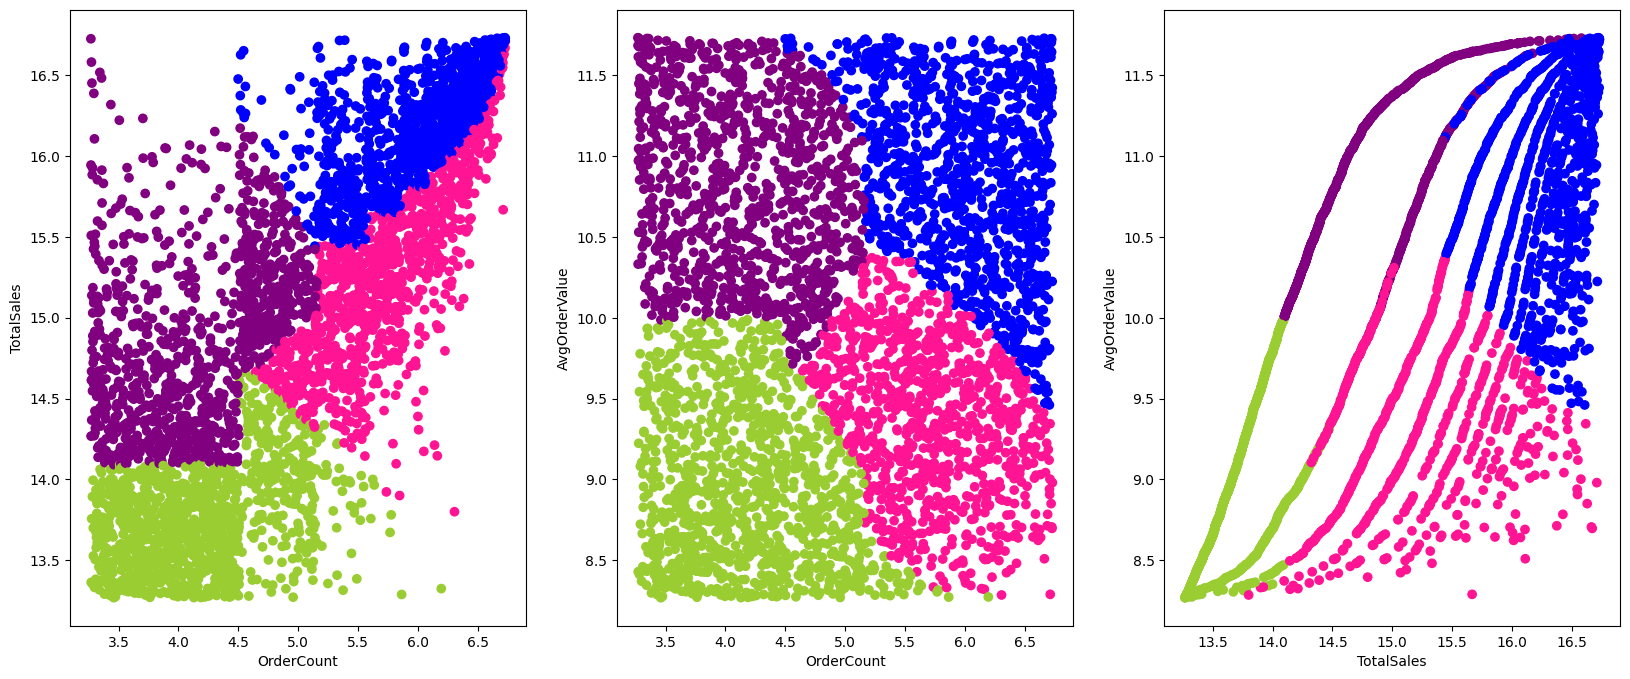

In [94]:
import matplotlib.pyplot as plt
# Create a colormap
import numpy as np
colormap = np.array(['purple', 'yellowgreen', 'deeppink','blue'])
# setup a figure
plt.figure(figsize=(20,8))

# add a subplot
plt.subplot(1,3,1)
# plot the data cluster
plt.scatter(dataset['OrderCount'], dataset['TotalSales'],c=colormap[cluster_ids])

plt.xlabel('OrderCount')
plt.ylabel('TotalSales')


# add a subplot
plt.subplot(1,3,2)
# plot the data cluster
plt.scatter(dataset['OrderCount'], dataset['AvgOrderValue'],c=colormap[cluster_ids])

plt.xlabel('OrderCount')
plt.ylabel('AvgOrderValue')

# add a subplot
plt.subplot(1,3,3)
# plot the data cluster
plt.scatter(dataset['TotalSales'], dataset['AvgOrderValue'],c=colormap[cluster_ids])

plt.xlabel('TotalSales')
plt.ylabel('AvgOrderValue')

plt.show()

# Hierarchical Clustering

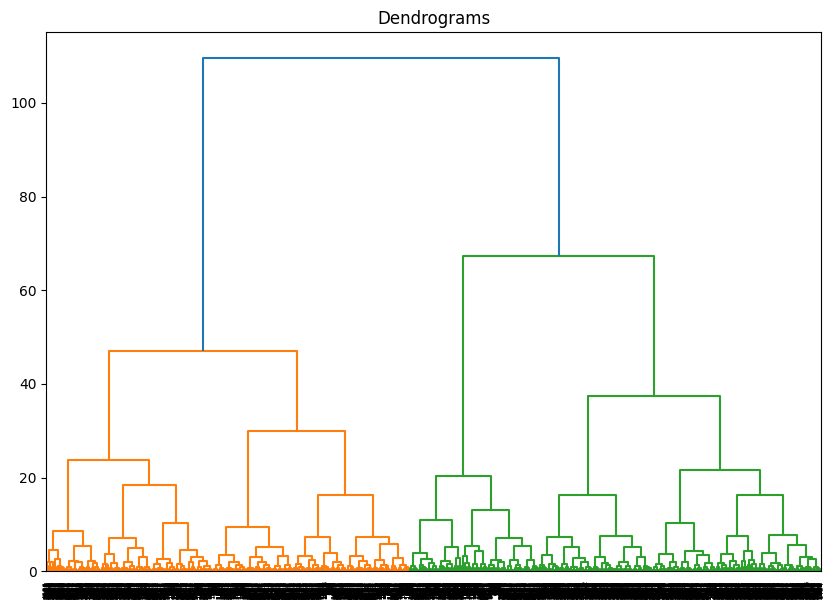

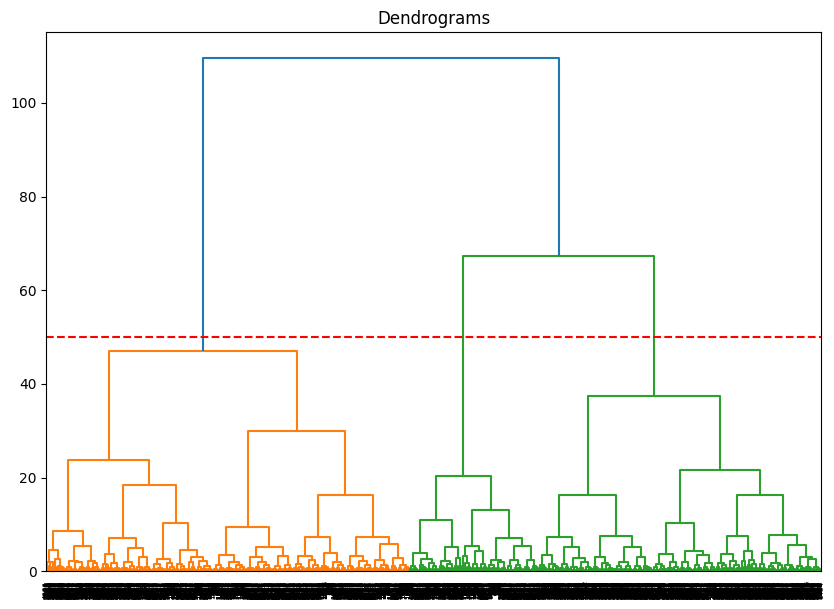

In [97]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Create graphs to show the relationships between data
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))

# Draw a horizontal line to show 4 clusters
plt.axhline(y=50, color='r', linestyle='--')  # Adjust y=50 based on dendrogram structure
plt.show()

**K-means Clustering with 3 Clusters**

In [98]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [99]:
cluster_ids = model.predict(X)
print(cluster_ids)

[0 2 2 ... 1 2 2]


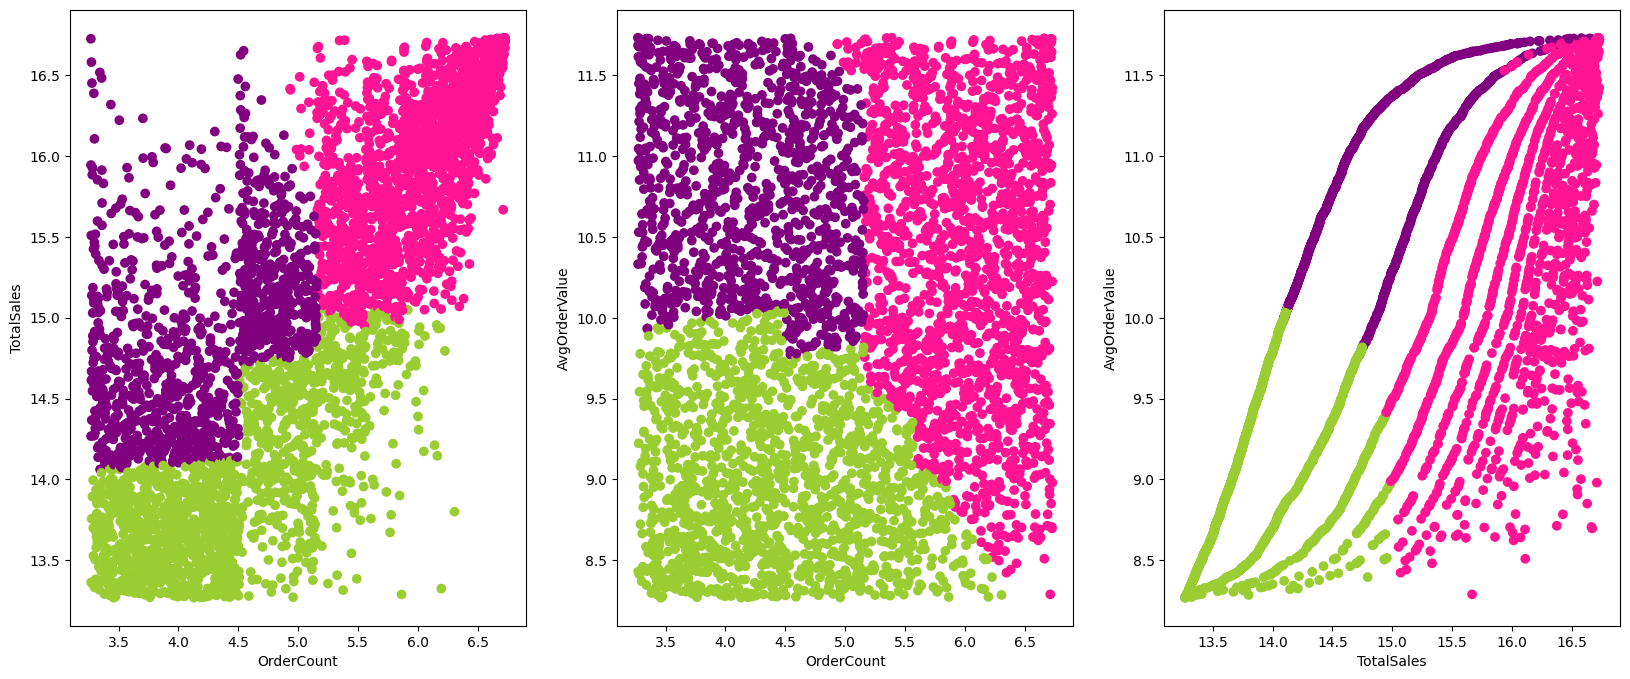

In [100]:
import matplotlib.pyplot as plt
# Create a colormap
import numpy as np
colormap = np.array(['purple', 'yellowgreen', 'deeppink','blue'])
# setup a figure
plt.figure(figsize=(20,8))

# add a subplot
plt.subplot(1,3,1)
# plot the data cluster
plt.scatter(dataset['OrderCount'], dataset['TotalSales'],c=colormap[cluster_ids])

plt.xlabel('OrderCount')
plt.ylabel('TotalSales')


# add a subplot
plt.subplot(1,3,2)
# plot the data cluster
plt.scatter(dataset['OrderCount'], dataset['AvgOrderValue'],c=colormap[cluster_ids])

plt.xlabel('OrderCount')
plt.ylabel('AvgOrderValue')

# add a subplot
plt.subplot(1,3,3)
# plot the data cluster
plt.scatter(dataset['TotalSales'], dataset['AvgOrderValue'],c=colormap[cluster_ids])

plt.xlabel('TotalSales')
plt.ylabel('AvgOrderValue')

plt.show()